## Tutorial notebook on how to use the CLMS Data Store for `LEGACY` datasets from the `CLMS API`

This notebook shows the lazy opening of datasets from the CLMS API that are opened as xarray datasets

### Setup
In order to run this notebook, you need to install [`xcube_clms`](https://github.com/xcube-dev/xcube-clms). You can install it following either of the steps below:

1. via `conda-forge`
```bash
conda env create -f environment.yml
conda activate xcube-clms
conda install xcube-clms
```

2. via Development mode

```bash
git clone https://github.com/xcube-dev/xcube-clms.git
cd xcube-clms
conda env create -f environment.yml
conda activate xcube-clms
pip install .
```


Note that [`xcube_clms`](https://github.com/xcube-dev/xcube-clms) is a plugin of [`xcube`](https://xcube.readthedocs.io/en/latest/), where `xcube` is included in the `environment.yml`.  

You also need the credentials from the Land Monitoring service. Please follows the steps outlined [`here`](https://eea.github.io/clms-api-docs/authentication.html) to download your credentials and place them in the same directory as this notebook.

In [1]:
%%time
import json

from xcube.core.store import new_data_store

CPU times: user 2.48 s, sys: 361 ms, total: 2.84 s
Wall time: 1.81 s


To get the credentials.json, please follow the steps outlined [here](https://eea.github.io/clms-api-docs/authentication.html)

In [2]:
%%time
json_file_path = "credentials.json"
with open(json_file_path, "r") as j:
    credentials = json.loads(j.read())

CPU times: user 527 μs, sys: 0 ns, total: 527 μs
Wall time: 363 μs


When the user creates a new CLMS data store, it already sends requests to the CLMS API to get the catalog information which takes around 15-20 seconds. If no path is provided for the cache location, it will create a `clms_cache/` in the current directory to store all the downloaded data and initialize a local file store

In [3]:
%%time
clms_data_store = new_data_store("clms", credentials=credentials)

CPU times: user 236 ms, sys: 106 ms, total: 343 ms
Wall time: 23.1 s


The `Cache Store` within the CLMS data store is another data store which can be any user-defined data store. It defaults to the `file` store. Use `cache_id` and `cache_params` to provide information about the data store you would like to use for caching the preloaded data 

In [4]:
%%time
clms_data_store.list_data_ids(include_attrs=True)[:5]

CPU times: user 6.2 ms, sys: 1.23 ms, total: 7.43 ms
Wall time: 7.16 ms


[('lake-ice-extent-europe-v2-250m',
  {'@id': 'bec918b1-0ac9-4a8f-8973-a88393c37905',
   'collection': '250m',
   'full_format': 'Netcdf',
   'full_path': 'https://globalland.vito.be/download/manifest/lie_250m_v2_daily_netcdf/manifest_clms_global_lie_250m_v2_daily_netcdf_latest.txt',
   'full_source': 'LEGACY',
   'layers': ['ALL BANDS'],
   'name': 'RASTER',
   'wekeo_choices': ''}),
 ('lake-water-quality-near-real-time-v2-0-300m',
  {'@id': '8fa1dbba-3898-4eb7-b84c-643c283246ca',
   'collection': '300m',
   'full_format': 'Netcdf',
   'full_path': 'https://globalland.vito.be/download/manifest/lwq_300m_v2_10daily-nrt_netcdf/manifest_clms_global_lwq_300m_v2_10daily-nrt_netcdf_latest.txt',
   'full_source': 'LEGACY',
   'layers': ['ALL BANDS'],
   'name': 'RASTER'}),
 ('clc-backbone-2021|CLMS_CLCplus_RASTER_2021',
  {'@id': 'b813d203-d09b-4663-95f7-65dc6d53789e',
   'area': 'Europe',
   'file': 'CLMS_CLCplus_RASTER_2021',
   'format': 'Geotiff',
   'path': 'H:\\Corine_Land_Cover_Backbon

In [5]:
%%time
clms_data_store.cache_store.root

CPU times: user 12 μs, sys: 2 μs, total: 14 μs
Wall time: 18.8 μs


'/home/yogesh/Projects/BC/xcube-clms/examples/notebooks/clms_cache'

In [6]:
%%time
clms_data_store.get_data_store_params_schema()

CPU times: user 35 μs, sys: 7 μs, total: 42 μs
Wall time: 44.1 μs


With the following command, the users can see how the data_ids look like for the CLMS store. Due to the nature of the API, we came up with the computed data_id for some products containing several datasets within it that combines the product_id and item_id along with the `|` separator. But as a user, you dont have to worry about how it is created, but just that you need to use the complete data_id for interacting with any of the methods of this store

In [7]:
%%time
clms_data_store.list_data_ids()[:20]

CPU times: user 1.94 ms, sys: 0 ns, total: 1.94 ms
Wall time: 1.96 ms


['lake-ice-extent-europe-v2-250m',
 'lake-water-quality-near-real-time-v2-0-300m',
 'clc-backbone-2021|CLMS_CLCplus_RASTER_2021',
 'burnt-area-v3-1-daily-300m',
 'clc-backbone-2018|CLMS_CLCplus_RASTER_2018_010m_eu_03035_V1_1',
 'forest-type-2015|FTY_2015_100m_eu_03035_d02_Full',
 'forest-type-2015|FTY_2015_020m_eu_03035_d04_Full',
 'forest-type-2015|FTY_2015_020m_eu_03035_d04_E00N20',
 'forest-type-2015|FTY_2015_020m_eu_03035_d04_E10N00',
 'forest-type-2015|FTY_2015_020m_eu_03035_d04_E10N10',
 'forest-type-2015|FTY_2015_020m_eu_03035_d04_E10N20',
 'forest-type-2015|FTY_2015_020m_eu_03035_d04_E20N10',
 'forest-type-2015|FTY_2015_020m_eu_03035_d04_E20N20',
 'forest-type-2015|FTY_2015_020m_eu_03035_d04_E20N30',
 'forest-type-2015|FTY_2015_020m_eu_03035_d04_E20N40',
 'forest-type-2015|FTY_2015_020m_eu_03035_d04_E20N50',
 'forest-type-2015|FTY_2015_020m_eu_03035_d04_E30N10',
 'forest-type-2015|FTY_2015_020m_eu_03035_d04_E30N20',
 'forest-type-2015|FTY_2015_020m_eu_03035_d04_E30N30',
 'fores

In [8]:
%%time
clms_data_store.get_data_opener_ids()

CPU times: user 4 μs, sys: 1 μs, total: 5 μs
Wall time: 6.91 μs


('dataset:zarr:file', 'dataset:netcdf:https')

In [9]:
%%time
clms_data_store.get_data_types()

CPU times: user 8 μs, sys: 0 ns, total: 8 μs
Wall time: 17.2 μs


('dataset',)

In [10]:
%%time
clms_data_store.get_open_data_params_schema()

CPU times: user 44.9 ms, sys: 2.11 ms, total: 47 ms
Wall time: 244 ms


In [11]:
%%time
clms_data_store.get_open_data_params_schema("daily-surface-soil-moisture-v1.0")

CPU times: user 39.5 ms, sys: 205 μs, total: 39.7 ms
Wall time: 226 ms


In [12]:
%%time
clms_data_store.has_data("daily-surface-soil-moisture-v1.0")

CPU times: user 39.1 ms, sys: 940 μs, total: 40 ms
Wall time: 228 ms


True

In [13]:
%%time
time_range = ("2020-01-01", "2020-03-25")
dataset = clms_data_store.open_data("daily-surface-soil-moisture-v1.0", time_range=time_range)

Attempt 1 failed: FileNotFoundError: https://globalland.vito.be/download/netcdf/surface_soil_moisture/ssm_1km_v1_daily/2020/20200220/c_gls_SSM1km_202002200000_CEURO_S1CSAR_V1.1.1.nc
Attempt 2 failed: FileNotFoundError: https://globalland.vito.be/download/netcdf/surface_soil_moisture/ssm_1km_v1_daily/2020/20200210/c_gls_SSM1km_202002100000_CEURO_S1CSAR_V1.1.1.nc
Attempt 3 failed: FileNotFoundError: https://globalland.vito.be/download/netcdf/surface_soil_moisture/ssm_1km_v1_daily/2020/20200210/c_gls_SSM1km_202002100000_CEURO_S1CSAR_V1.1.1.nc
Attempt 4 failed: FileNotFoundError: https://globalland.vito.be/download/netcdf/surface_soil_moisture/ssm_1km_v1_daily/2020/20200210/c_gls_SSM1km_202002100000_CEURO_S1CSAR_V1.1.1.nc


CPU times: user 6.88 s, sys: 1.35 s, total: 8.23 s
Wall time: 2min 8s


In [14]:
dataset

<xarray.Dataset> Size: 19GB
Dimensions:    (time: 85, lat: 4144, lon: 6832)
Coordinates:
  * lat        (lat) float64 33kB 72.0 71.99 71.98 71.97 ... 35.02 35.01 35.0
  * lon        (lon) float64 55kB -11.0 -10.99 -10.98 ... 49.98 49.99 50.0
  * time       (time) datetime64[ns] 680B 2020-01-01 2020-01-02 ... 2020-03-25
Data variables:
    crs        (time) |S1 85B b'' b'' b'' b'' b'' b'' ... b'' b'' b'' b'' b''
    ssm        (time, lat, lon) float32 10GB dask.array<chunksize=(1, 1382, 2278), meta=np.ndarray>
    ssm_noise  (time, lat, lon) float32 10GB dask.array<chunksize=(1, 1382, 2278), meta=np.ndarray>
Attributes: (12/26)
    Conventions:               CF-1.6
    archive_facility:          VITO
    copyright:                 Copernicus Service information 2020
    geospatial_lat_max:        72.0
    geospatial_lat_min:        35.0
    geospatial_lon_max:        50.0
    ...                        ...
    region_name:               CEURO
    sensor:                    CSAR
    source:                    Derived from EO radar observations
    time_coverage_end:         2020-01-01T23:59:59Z
    time_coverage_start:       2020-01-01T00:00:00Z
    title:                     Daily Surface Soil Moisture 1km: CEURO 2020-01...

CPU times: user 2.48 s, sys: 1.44 s, total: 3.91 s
Wall time: 3.84 s


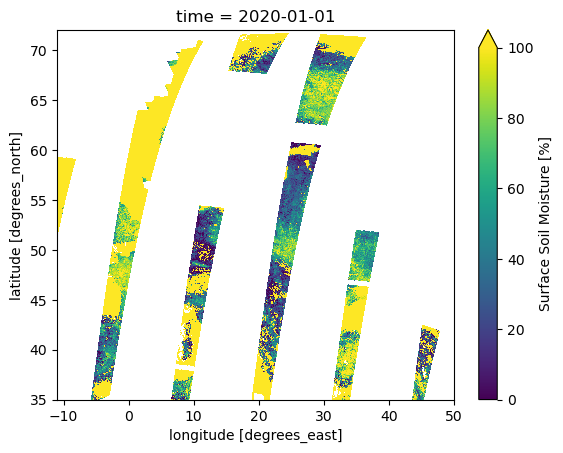

In [15]:
%%time
dataset.isel(time=0).ssm.plot(vmin=0, vmax=100)